In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
class FeatureExtractor:
    def __init__(self, max_features=10000, ngram_range=(1, 2)):
        """
        Initialize vectorizers.
        
        Parameters:
        - max_features: Keep top 5000 most frequent words
        - ngram_range: (1,2) means unigrams + bigrams
          Example: "profit increase" → 
            unigrams: ['profit', 'increase']
            bigrams: ['profit increase']
        """
        self.max_features = max_features
        self.ngram_range = ngram_range
        self.bow_vectorizer = CountVectorizer(
            max_features=max_features,
            ngram_range=ngram_range,
            min_df=2,           # Ignore words in <2 docs
            max_df=0.8,         # Ignore words in >80% docs
            stop_words='english'
        )
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=max_features,
            ngram_range=ngram_range,
            min_df=2,
            max_df=0.8,
            sublinear_tf=True,
            stop_words='english'
        )
    
    def fit_transform_bow(self, texts):
        sp_matrix=self.bow_vectorizer.fit_transform(texts)
        return (sp_matrix,self.bow_vectorizer.get_feature_names_out())
    
    def fit_transform_tfidf(self, texts):
        sp_matrix=self.tfidf_vectorizer.fit_transform(texts)
        return (sp_matrix,self.tfidf_vectorizer.get_feature_names_out())
    
    def get_top_features(self, vectorizer, X, n=20):
        tfidf=X.mean(axis=0).A1
        names=vectorizer.get_feature_names_out()
        order=np.argsort(tfidf)[-n::]
        return [(names[i],tfidf[i]) for i in order]
    
    def visualize_top_features(self, vectorizer, X, n=20):
        tops=self.get_top_features(vectorizer,X,n)
        features=[k[0] for k in tops]
        scores=[k[1] for k in tops]
        plt.barh(features,scores)


BOW sparse matrix shape: (4846, 10000)
TFIDF sparse matrix shape: (4846, 10000)
Vocabulary size: 10000
top 20 features with max tfidf scores:
eur			avg_tfidf_score = 0.02109173493555699
company			avg_tfidf_score = 0.018827179348349928
mn			avg_tfidf_score = 0.013523798453825954
said			avg_tfidf_score = 0.012841812594075314
sales			avg_tfidf_score = 0.01277944054435738
profit			avg_tfidf_score = 0.011212938969883757
finnish			avg_tfidf_score = 0.01109310868311489
year			avg_tfidf_score = 0.011064582017534868
million			avg_tfidf_score = 0.011049334326774716
net			avg_tfidf_score = 0.010903639411124202
finland			avg_tfidf_score = 0.0101179941796875
operating			avg_tfidf_score = 0.009376008402949
group			avg_tfidf_score = 0.008762997631484618
2009			avg_tfidf_score = 0.008707002366155132
new			avg_tfidf_score = 0.008515499819353836
2008			avg_tfidf_score = 0.008470477597931826
business			avg_tfidf_score = 0.008384714182739771
net sales			avg_tfidf_score = 0.008170512991704891
2007			avg_tf

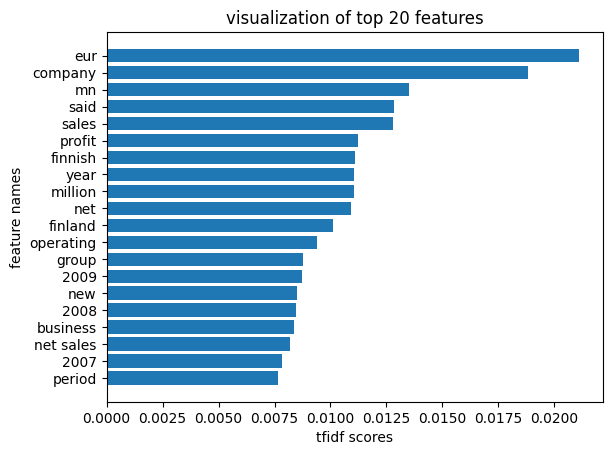

In [10]:
obj=FeatureExtractor()
f=np.array(pd.read_csv('all-data.csv',names=['sentiment','feedback'],encoding_errors='ignore')['feedback'])

#text=['I eat apple','You love me','I love you','She eat me','Love everyone']
X1=obj.fit_transform_bow(f)
print('BOW sparse matrix shape:',X1[0].shape)
X=obj.fit_transform_tfidf(f)[0]
print('TFIDF sparse matrix shape:',X.shape)
print('Vocabulary size:',len(obj.tfidf_vectorizer.vocabulary_))
tops=obj.get_top_features(obj.tfidf_vectorizer,X)[::-1]
print('top 20 features with max tfidf scores:')
for t in tops:
    print(str(t[0])+'\t\t\tavg_tfidf_score = '+str(t[1]))
print('\n\n')
obj.visualize_top_features(obj.tfidf_vectorizer,X,20)
plt.xlabel('tfidf scores')
plt.ylabel('feature names')
plt.title('visualization of top 20 features')
plt.show()